In [3]:
import os
import numpy as np
import xarray as xr
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [5]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite')

In [15]:
DATA = xr.open_dataset(os.path.join(dir_base,'IMERG','1dy','IMERG_Italy_1dy_2000_06_01_2024_02_29.nc'))

lon = DATA.lon.values
lat = DATA.lat.values
lon2d, lat2d = np.meshgrid(lon, lat)

PRE = DATA.PRE.values
PRE[PRE < 1] = np.nan  # Set negative values to NaN

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)


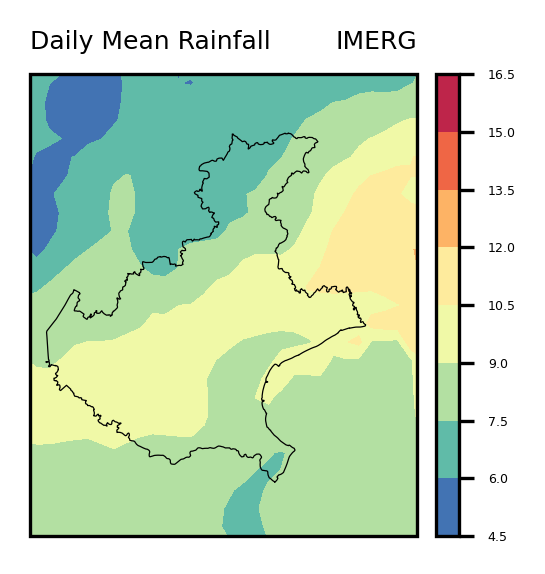

In [24]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,2),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.5, 44.5, 47],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.3, zorder=10)
a1 = ax1.contourf(lon2d, lat2d, np.nanmean(PRE,axis=0),cmap=cmap, shading='auto')
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.02, fraction=0.042)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('IMERG', fontsize=6, loc='right')
ax1.set_title('Daily Mean Rainfall', fontsize=6, loc='left')

ax1.set_facecolor('white')
fig.patch.set_alpha(0)